In [1]:

# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import random



## 데이터 준비

In [2]:
# 데이터셋 준비
(X_train_all, y_train_all), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 데이터셋 크기 확인
print(X_train_all.shape, y_train_all.shape)
# 3차원 배열 60000개

print(X_test.shape)

print(X_train_all[0].shape)

(60000, 28, 28) (60000,)
(10000, 28, 28)
(28, 28)


In [3]:
# 숫자 레이블을 실제 레이블과 연결하여 확인
target_values = {0 : 'T-shirt/top', 
                 1 : 'Trouser', 
                 2: 'Pullover', 
                 3: 'Dress', 
                 4: 'Coat', 
                 5: 'Sandal', 
                 6: 'Shirt', 
                 7: 'Sneaker', 
                 8: 'Bag', 
                 9: 'Ankle boot'}
print(y_train_all[0])
print(target_values[y_train_all[0]])

9
Ankle boot


   0   0   0   0   0   0   0   0   0  40   0   0   0   0   0   0   0  26   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 213 250 196  47  17   2   4   8 181 236 204   1   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 189 236 238 254 246 255 255 241 240 226 243  35   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 228 235 221 225 234 215 227 227 225 224 246  71   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 252 232 226 226 222 232 225 225 233 227 245 146   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 255 227 228 226 227 226 226 238 229 220 241 224   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   3 255 226 227 228 228 228 232 226 137 130 216 255   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  22 255 227 228 227 226 226 235 217 139 130 210 235   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  59 255 226 230 229 229 229 229 242 212 207 233 237  13   0   0   0

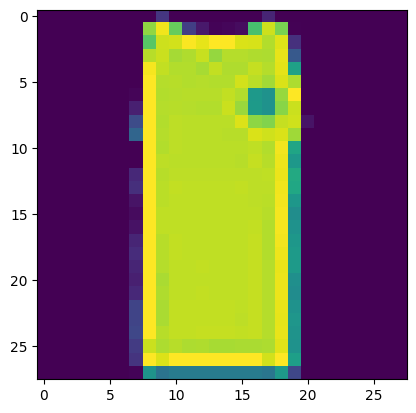

In [4]:
closet = X_test[499]
for i in range(28):
    for j in range(28):
        print(f'{closet[i][j]:4d}', end='')
    print()

plt.imshow(closet)

In [5]:
print(target_values[y_test[499]])

T-shirt/top


## 데이터 분할, 차원 변경, 정규화

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all,
                                                  stratify=y_train_all,
                                                  test_size=0.2,
                                                  random_state=42)

X_train = X_train[..., tf.newaxis]
X_val = X_val[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]
# X_train = np.expand_dim(X_train, axis=-1)도 동일

X_train.shape

(48000, 28, 28, 1)

## CNN Ver.1 - Basic CNN

In [7]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Conv2D(filters=16, kernel_size=(3,3),
                  activation='relu', input_shape=(28,28,1)))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(units=64, activation='relu'))
model1.add(Dense(units=10, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy',
               metrics='accuracy',
               optimizer='adam')
model1.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 64)                173120    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 173,930
Trainable params: 173,93

2023-02-23 14:55:05.280563: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-23 14:55:05.280663: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
hist1 = model1.fit(X_train, y_train, epochs=20, 
           validation_data=(X_val, y_val), 
           verbose=2,
           batch_size=64)

Epoch 1/20


2023-02-23 14:55:05.491865: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-23 14:55:05.652685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-23 14:55:09.821203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


750/750 - 5s - loss: 1.4682 - accuracy: 0.7337 - val_loss: 0.5536 - val_accuracy: 0.8016 - 5s/epoch - 7ms/step
Epoch 2/20
750/750 - 5s - loss: 0.4953 - accuracy: 0.8187 - val_loss: 0.4491 - val_accuracy: 0.8360 - 5s/epoch - 6ms/step
Epoch 3/20
750/750 - 5s - loss: 0.4060 - accuracy: 0.8461 - val_loss: 0.3818 - val_accuracy: 0.8650 - 5s/epoch - 6ms/step
Epoch 4/20
750/750 - 5s - loss: 0.3414 - accuracy: 0.8748 - val_loss: 0.3498 - val_accuracy: 0.8811 - 5s/epoch - 6ms/step
Epoch 5/20
750/750 - 5s - loss: 0.2948 - accuracy: 0.8932 - val_loss: 0.3302 - val_accuracy: 0.8835 - 5s/epoch - 6ms/step
Epoch 6/20
750/750 - 5s - loss: 0.2741 - accuracy: 0.9000 - val_loss: 0.3176 - val_accuracy: 0.8923 - 5s/epoch - 6ms/step
Epoch 7/20
750/750 - 5s - loss: 0.2599 - accuracy: 0.9032 - val_loss: 0.3531 - val_accuracy: 0.8829 - 5s/epoch - 6ms/step
Epoch 8/20
750/750 - 5s - loss: 0.2422 - accuracy: 0.9101 - val_loss: 0.3004 - val_accuracy: 0.8954 - 5s/epoch - 6ms/step
Epoch 9/20
750/750 - 5s - loss: 0.2

In [9]:
# 손실 함수 그래프
def plot_loss_curve(history, total_epoch=10, start=1):
    plt.figure(figsize=(5, 5))
    plt.plot(range(start, total_epoch + 1), 
             history.history['loss'][start-1:total_epoch], 
             label='Train')
    plt.plot(range(start, total_epoch + 1), 
             history.history['val_loss'][start-1:total_epoch], 
             label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
# 정확도 그래프
def plot_acc_curve(history, total_epoch=10, start=1):
    plt.figure(figsize=(5, 5))
    plt.plot(range(start, total_epoch + 1), 
             history.history['accuracy'][start-1:total_epoch], 
             label='Train', c='blue')
    plt.plot(range(start, total_epoch + 1), 
             history.history['val_accuracy'][start-1:total_epoch], 
             label='Validation', c='r', ls='--')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

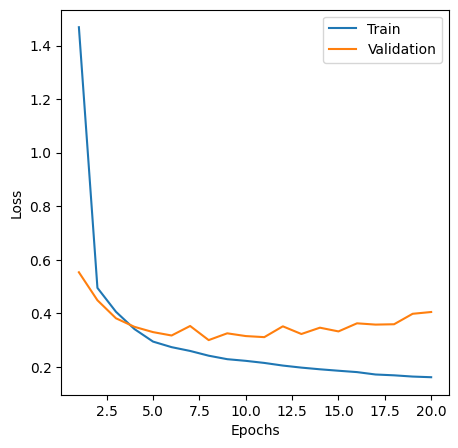

In [10]:
plot_loss_curve(hist1, 20, 1)

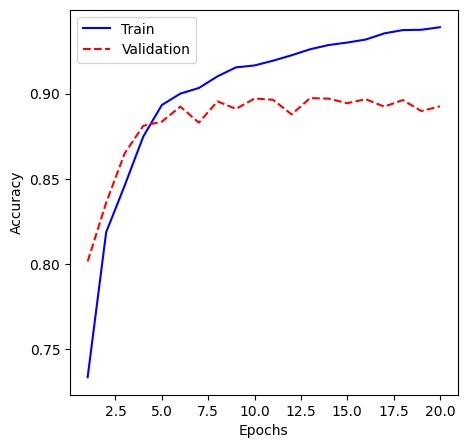

In [11]:
plot_acc_curve(hist1, 20, 1)

## CNN Ver.2 - DropOut 레이어 및 Early Stopping Call Back

###  DropOut 레이어 추가


In [12]:
from keras.layers import Dropout

model2 = Sequential()
model2.add(Conv2D(filters=16, kernel_size=(3,3),
                  activation='relu', input_shape=(28,28,1)))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(units=64, activation='relu'))
# Dropout
model2.add(Dropout(rate=0.5))
model2.add(Dense(units=10, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
               metrics='accuracy',
               optimizer='adam')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2704)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                173120    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                      

### EarlyStopping 적용

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', patience=10)

hist2 = model2.fit(X_train, y_train, batch_size=64, epochs=100,
                   validation_data=(X_val, y_val),
                   callbacks=[early_stopping],
                   verbose=2)

Epoch 1/100


2023-02-23 14:56:38.613347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-23 14:56:43.128404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


750/750 - 5s - loss: 2.1680 - accuracy: 0.3134 - val_loss: 1.3033 - val_accuracy: 0.5312 - 5s/epoch - 7ms/step
Epoch 2/100
750/750 - 5s - loss: 1.4616 - accuracy: 0.4653 - val_loss: 0.8128 - val_accuracy: 0.7339 - 5s/epoch - 7ms/step
Epoch 3/100
750/750 - 5s - loss: 1.0855 - accuracy: 0.5844 - val_loss: 0.5962 - val_accuracy: 0.7560 - 5s/epoch - 7ms/step
Epoch 4/100
750/750 - 5s - loss: 0.8318 - accuracy: 0.6709 - val_loss: 0.5159 - val_accuracy: 0.7810 - 5s/epoch - 7ms/step
Epoch 5/100
750/750 - 5s - loss: 0.7012 - accuracy: 0.7192 - val_loss: 0.4284 - val_accuracy: 0.8359 - 5s/epoch - 7ms/step
Epoch 6/100
750/750 - 5s - loss: 0.6108 - accuracy: 0.7589 - val_loss: 0.3826 - val_accuracy: 0.8688 - 5s/epoch - 7ms/step
Epoch 7/100
750/750 - 5s - loss: 0.5531 - accuracy: 0.7891 - val_loss: 0.3628 - val_accuracy: 0.8696 - 5s/epoch - 7ms/step
Epoch 8/100
750/750 - 5s - loss: 0.4911 - accuracy: 0.8200 - val_loss: 0.3372 - val_accuracy: 0.8810 - 5s/epoch - 7ms/step
Epoch 9/100
750/750 - 5s - l

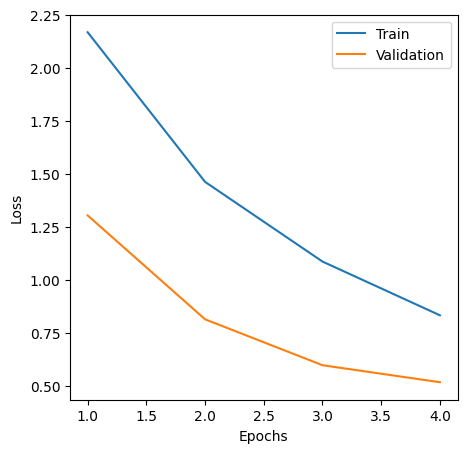

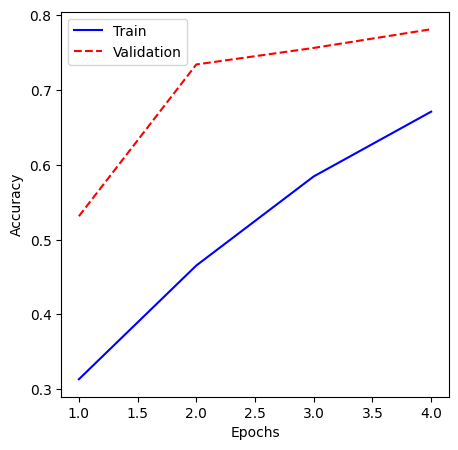

In [14]:
plot_loss_curve(hist2, len(hist2.history), 1)
plot_acc_curve(hist2, len(hist2.history), 1)

In [15]:
len(hist2.history['loss'])

29

In [16]:
pd.DataFrame(hist2.history)

,loss,accuracy,val_loss,val_accuracy
0,2.168040,0.313375,1.303311,0.531167
1,1.461647,0.465312,0.812791,0.733917
2,1.085475,0.584354,0.596171,0.756000
3,0.831839,0.670854,0.515905,0.781000
4,0.701196,0.719229,0.428362,0.835917
5,0.610808,0.758854,0.382562,0.868833
6,0.553061,0.789104,0.362843,0.869583
7,0.491096,0.819979,0.337219,0.881000
8,0.459953,0.828812,0.341519,0.880500
9,0.437945,0.837708,0.336497,0.886000


In [17]:
comp_df = pd.concat([pd.DataFrame(hist1.history), pd.DataFrame(hist2.history)], axis=1)
comp_df

,loss,accuracy,val_loss,val_accuracy,loss,accuracy,val_loss,val_accuracy
0,1.468243,0.733688,0.553598,0.801583,2.168040,0.313375,1.303311,0.531167
1,0.495312,0.818750,0.449100,0.836000,1.461647,0.465312,0.812791,0.733917
2,0.406044,0.846125,0.381813,0.865000,1.085475,0.584354,0.596171,0.756000
3,0.341400,0.874750,0.349836,0.881083,0.831839,0.670854,0.515905,0.781000
4,0.294804,0.893250,0.330203,0.883500,0.701196,0.719229,0.428362,0.835917
5,0.274085,0.899958,0.317596,0.892333,0.610808,0.758854,0.382562,0.868833
6,0.259916,0.903250,0.353088,0.882917,0.553061,0.789104,0.362843,0.869583
7,0.242177,0.910062,0.300394,0.895417,0.491096,0.819979,0.337219,0.881000
8,0.229190,0.915333,0.325720,0.891000,0.459953,0.828812,0.341519,0.880500
9,0.222993,0.916458,0.315457,0.897083,0.437945,0.837708,0.336497,0.886000


### CNN Ver.3 - 사용자 정의 콜백, ModelCheckPoint, load_model

In [18]:
import os
from tensorflow.keras.callbacks import Callback

class my_callback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > 0.91):
            self.model.stop_training = True
            print('\n')
            print(f'목표 정확도 달성: 검증 정확도 {logs.get("val_accuracy"):.4f}')

my_callback = my_callback()

In [19]:
# Best model 저장법
from tensorflow.keras.callbacks import ModelCheckpoint

best_model_path = os.getcwd() + 'best_cnn_model.h5'
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss',
                                  save_best_only=True, save_weight_only=False)

# CNN 모델 학습
model3 = Sequential()
model3.add(Conv2D(filters=16, kernel_size=(3,3),
                  activation='relu', input_shape=(28,28,1)))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Flatten())
model3.add(Dense(units=64, activation='relu'))

model3.add(Dropout(rate=0.5))
model3.add(Dense(units=10, activation='softmax'))

model3.compile(loss='sparse_categorical_crossentropy',
               metrics='accuracy',
               optimizer='adam')
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2704)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                173120    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

In [20]:
hist3 = model3.fit(X_train, y_train, batch_size=64, epochs=100,
                   validation_data=(X_val, y_val),
                   callbacks=[my_callback, save_best_model],
                   verbose=2)

Epoch 1/100


2023-02-23 14:59:05.463104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-23 14:59:10.018853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


750/750 - 6s - loss: 1.9663 - accuracy: 0.3934 - val_loss: 1.0048 - val_accuracy: 0.6503 - 6s/epoch - 7ms/step
Epoch 2/100
750/750 - 5s - loss: 1.2616 - accuracy: 0.5279 - val_loss: 0.7819 - val_accuracy: 0.7302 - 5s/epoch - 7ms/step
Epoch 3/100
750/750 - 5s - loss: 1.0768 - accuracy: 0.5878 - val_loss: 0.7254 - val_accuracy: 0.7417 - 5s/epoch - 7ms/step
Epoch 4/100
750/750 - 5s - loss: 0.9727 - accuracy: 0.6157 - val_loss: 0.6644 - val_accuracy: 0.7517 - 5s/epoch - 7ms/step
Epoch 5/100
750/750 - 5s - loss: 0.8642 - accuracy: 0.6516 - val_loss: 0.6207 - val_accuracy: 0.7608 - 5s/epoch - 7ms/step
Epoch 6/100
750/750 - 5s - loss: 0.7540 - accuracy: 0.7047 - val_loss: 0.5591 - val_accuracy: 0.7876 - 5s/epoch - 7ms/step
Epoch 7/100
750/750 - 5s - loss: 0.6567 - accuracy: 0.7408 - val_loss: 0.5162 - val_accuracy: 0.8079 - 5s/epoch - 7ms/step
Epoch 8/100
750/750 - 5s - loss: 0.5616 - accuracy: 0.7802 - val_loss: 0.4113 - val_accuracy: 0.8629 - 5s/epoch - 7ms/step
Epoch 9/100
750/750 - 5s - l

In [21]:
comp_df = pd.concat([comp_df, pd.DataFrame(hist3.history)], axis=1)
comp_df

,loss,accuracy,val_loss,val_accuracy,loss,accuracy,val_loss,val_accuracy,loss,accuracy,val_loss,val_accuracy
0,1.468243,0.733688,0.553598,0.801583,2.168040,0.313375,1.303311,0.531167,1.966339,0.393438,1.004800,0.650250
1,0.495312,0.818750,0.449100,0.836000,1.461647,0.465312,0.812791,0.733917,1.261647,0.527875,0.781875,0.730167
2,0.406044,0.846125,0.381813,0.865000,1.085475,0.584354,0.596171,0.756000,1.076801,0.587771,0.725415,0.741667
3,0.341400,0.874750,0.349836,0.881083,0.831839,0.670854,0.515905,0.781000,0.972710,0.615729,0.664440,0.751667
4,0.294804,0.893250,0.330203,0.883500,0.701196,0.719229,0.428362,0.835917,0.864244,0.651604,0.620696,0.760833
...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.179844,0.932583,0.582612,0.900333
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167675,0.935708,0.573597,0.897083
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175822,0.933000,0.562801,0.899833
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.173439,0.934667,0.570891,0.899000
